<a href="https://colab.research.google.com/github/jumbokh/python_learn/blob/master/notebooks/creditcard_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# coding: utf-8



#### # 第6讲 统计推断基础
#### - 数据说明：本数据是地区房价增长率数据
#### - 名称-中文含义
#### - dis_name-小区名称
#### - rate-房价同比增长率

In [2]:
# import os
#os.chdir(r"D:\Python_book\6Inference")

In [3]:
import pandas as pd

In [4]:
house_price_gr = pd.read_csv(r'house_price_gr.csv', encoding='gbk')
house_price_gr.head()

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484
2,东城区胡家园小区,0.141358
3,东城区台基厂小区,0.063197
4,东城区青年湖小区,0.101528


#### ## 6.1 参数估计
#### 进行描述性统计分析

In [5]:
house_price_gr.describe(include='all')

,dis_name,rate
count,150,150.000000
unique,150,NaN
top,东城区甘南小区,NaN
freq,1,NaN
mean,NaN,0.110061
std,NaN,0.041333
min,NaN,0.029540
25%,NaN,0.080027
50%,NaN,0.104908
75%,NaN,0.140066


In [6]:
# Histograph
%matplotlib inline
import seaborn as sns
from scipy import stats

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


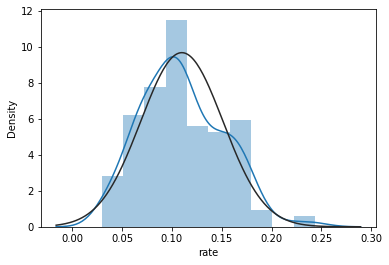

In [7]:
sns.distplot(house_price_gr.rate, kde=True, fit=stats.norm) # Histograph

#### # Q-Q

In [8]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


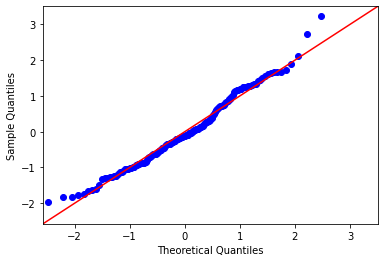

In [9]:
fig = sm.qqplot(house_price_gr.rate, fit=True, line='45')
fig.show()

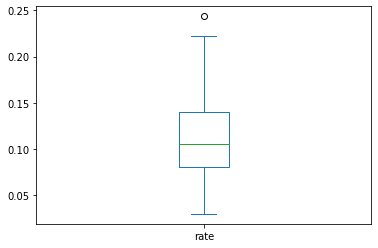

In [10]:
# Box Plots
house_price_gr.plot(kind='box') # Box Plots

#### # 置信度区间估计

In [11]:
se = house_price_gr.rate.std() / len(house_price_gr) ** 0.5
LB = house_price_gr.rate.mean() - 1.98 * se
UB = house_price_gr.rate.mean() + 1.98 * se
(LB, UB)

(0.10337882853175007, 0.11674316487209624)

#### # 如果要求任意置信度下的置信区间的话，可以自己编一个函数

In [12]:
def confint(x, alpha=0.05):
    n = len(x)
    xb = x.mean()
    df = n-1
    tmp = (x.std() / n ** 0.5) * stats.t.ppf(1-alpha/2, df)
    return {'Mean': xb, 'Degree of Freedom':df, 'LB':xb-tmp, 'UB':xb+tmp}

In [13]:
confint(house_price_gr.rate, 0.05)

{'Degree of Freedom': 149,
 'LB': 0.10339228338892809,
 'Mean': 0.11006099670192315,
 'UB': 0.11672971001491822}

In [14]:
# 或者使用DescrStatsW
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
d1.tconfint_mean(0.05) # 

(0.10339228338892816, 0.11672971001491829)

#### ## 6.2 假设检验与单样本T检验
#### 当年住宅价格的增长率是否超过了10%的阈值

In [15]:
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
print('t-statistic=%6.4f, p-value=%6.4f, df=%s' %d1.ttest_mean(0.1))

t-statistic=2.9812, p-value=0.0034, df=149.0


#### ## 6.3 两样本T检验
#### 导入数据
#### 数据说明：本数据是一份汽车贷款数据

#### |字段名|中文含义|
#### |:--:|:--:|
#### |id|id|
#### |Acc|是否开卡(1=已开通)|
#### |avg_exp|月均信用卡支出（元）|
#### |avg_exp_ln|月均信用卡支出的自然对数|
#### |gender|性别(男=1)|
#### |Age|年龄|
#### |Income|年收入（万元）|
#### |Ownrent|是否自有住房（有=1；无=0)|
#### |Selfempl|是否自谋职业(1=yes, 0=no)|
#### |dist_home_val|所住小区房屋均价(万元)|
#### |dist_avg_income|当地人均收入|
#### |high_avg|高出当地平均收入|
#### |edu_class|教育等级：小学及以下开通=0，中学=1，本科=2，研究生=3|

In [17]:
creditcard= pd.read_csv(r'creditcard_exp.csv', skipinitialspace=True)

In [18]:
creditcard['Income'].groupby(creditcard['Acc']).describe()

,count,mean,std,min,25%,50%,75%,max
Acc,,,,,,,,
0,30.0,3.149333,1.406482,1.5000,2.285000,2.905000,3.807500,8.40000
1,70.0,7.424706,3.077986,3.4939,5.175662,6.443525,8.494237,16.90015


#### # - 第一步:方差齐次检验

In [19]:
Suc0 = creditcard[creditcard['Acc'] == 0]['Income']
Suc1 = creditcard[creditcard['Acc'] == 1]['Income']
leveneTestRes = stats.levene(Suc0, Suc1, center='median')
print('w-value=%6.4f, p-value=%6.4f' %leveneTestRes)

w-value=7.1829, p-value=0.0086


#### # - 第二步:T-test

In [20]:
stats.stats.ttest_ind(Suc0, Suc1, equal_var=False)

Ttest_indResult(statistic=-9.529516968736448, pvalue=1.3263066753296544e-15)

#### Or Try: sm.stats.ttest_ind(gender0, gender1, usevar='pooled')
###%%
####测试一下性别对是月均消费的作用.
####注意对缺失值得处理
####creditcard['avg_exp'].groupby(creditcard['gender']).describe()
###%%
####female= creditcard[creditcard['gender'] == 0]['avg_exp'].dropna()
####male = creditcard[creditcard['gender'] == 1]['avg_exp'].dropna()
####leveneTestRes = stats.levene(female, male, center='median')
####print('w-value=%6.4f, p-value=%6.4f' %leveneTestRes)
###%%
####stats.stats.ttest_ind(female, male, equal_var=True)

#### ## 6.4 方差分析
#### - 单因素方差分析

In [21]:
pd.set_option('display.max_columns', None) # 设置显示所有列
creditcard.groupby('edu_class')[['avg_exp']].describe().T

edu_class               0           1            2            3
avg_exp count    2.000000   23.000000    23.000000    22.000000
        mean   207.370000  641.937826   973.321304  1422.280909
        std     62.494097  147.577741   229.163196   435.281442
        min    163.180000  418.780000   610.250000   816.030000
        25%    185.275000  525.595000   807.820000  1166.997500
        50%    207.370000  593.920000   959.830000  1343.025000
        75%    229.465000  736.140000  1075.270000  1661.412500
        max    251.560000  987.660000  1472.820000  2430.030000

In [22]:
# 利用回归模型中的方差分析
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
sm.stats.anova_lm(ols('avg_exp ~ C(edu_class)',data=creditcard).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,31.825683,7.658362e-13
Residual,66.0,5.617263e+06,8.511005e+04,NaN,NaN


### # - 多因素方差分析

不考虑交互相

In [24]:
sm.stats.anova_lm(ols('avg_exp ~ C(edu_class)+C(gender)',data=creditcard).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,31.578365,1.031496e-12
C(gender),1.0,4.178273e+04,4.178273e+04,0.487111,4.877082e-01
Residual,65.0,5.575481e+06,8.577662e+04,NaN,NaN


考虑交互相

In [25]:
sm.stats.anova_lm(ols('avg_exp ~ C(edu_class)+C(gender)+C(edu_class)*C(gender)',data=creditcard).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,33.839350,3.753889e-13
C(gender),1.0,4.178273e+04,4.178273e+04,0.521988,4.726685e-01
C(edu_class):C(gender),3.0,5.355799e+05,1.785266e+05,2.230316,9.333507e-02
Residual,63.0,5.042862e+06,8.004544e+04,NaN,NaN


### # ## 6.5 相关分析
### 散点图

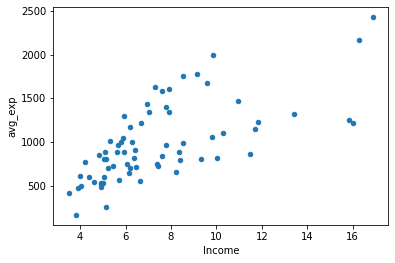

In [26]:
creditcard.plot(x='Income', y='avg_exp', kind='scatter')

### #当发现散点图有发散的趋势时，首先需要对Y取对数，而且还应该尝试对X也取对数
#%%

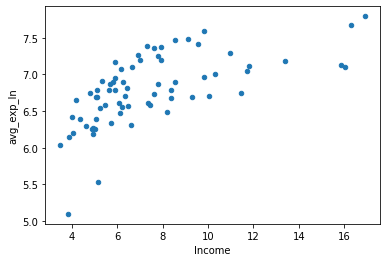

In [27]:
creditcard.plot(x='Income', y='avg_exp_ln', kind='scatter')

### 相关性分析:“spearman”,“pearson” 和 "kendall"
####import numpy as np
####creditcard['Income_ln']=np.log(creditcard['Income'])

In [28]:
creditcard[['avg_exp_ln', 'Income']].corr(method='pearson')

,avg_exp_ln,Income
avg_exp_ln,1.00000,0.63489
Income,0.63489,1.00000


#### ## 6.6卡方检验

In [29]:
cross_table = pd.crosstab(creditcard.edu_class, columns=creditcard.Acc)
# Or try this: accepts.pivot_table(index='bankruptcy_ind',columns='bad_ind', values='application_id', aggfunc='count')
cross_table

Acc,0,1
edu_class,,
0,16,2
1,14,23
2,0,23
3,0,22


In [30]:
cross_table_rowpct = cross_table.div(cross_table.sum(1),axis = 0)
cross_table_rowpct

Acc,0,1
edu_class,,
0,0.888889,0.111111
1,0.378378,0.621622
2,0.000000,1.000000
3,0.000000,1.000000


In [31]:
print('chisq = %6.4f\n p-value = %6.4f\n dof = %i\n expected_freq = %s'  %stats.chi2_contingency(cross_table))

chisq = 50.0930
 p-value = 0.0000
 dof = 3
 expected_freq = [[ 5.4 12.6]
 [11.1 25.9]
 [ 6.9 16.1]
 [ 6.6 15.4]]
